# GVradar V1.5 #
### Quick example of DP_products - Execute get_kwargs below first


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Done.


DP products parameters:    

{'site': 'NPOL', 'scan_type': 'PPI', 'month': '11', 'day': '27', 'year': '2022', 'hh': '19', 'mm': '55', 'ss': '16', 'ref_field_name': 'CZ', 'phi_field_name': 'PH', 'zdr_field_name': 'DR', 'radar_band': 'S', 'output_cf': False, 'cf_dir': './cf/', 'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD', 'SQ', 'FH', 'RC', 'DM', 'NW', 'RP'], 'do_HID_summer': True, 'do_HID_winter': False, 'no_temp': False, 'get_Bringi_kdp': True, 'do_mass': True, 'do_RC': True, 'do_RP': True, 'de_ice': False, 'do_tokay_DSD'

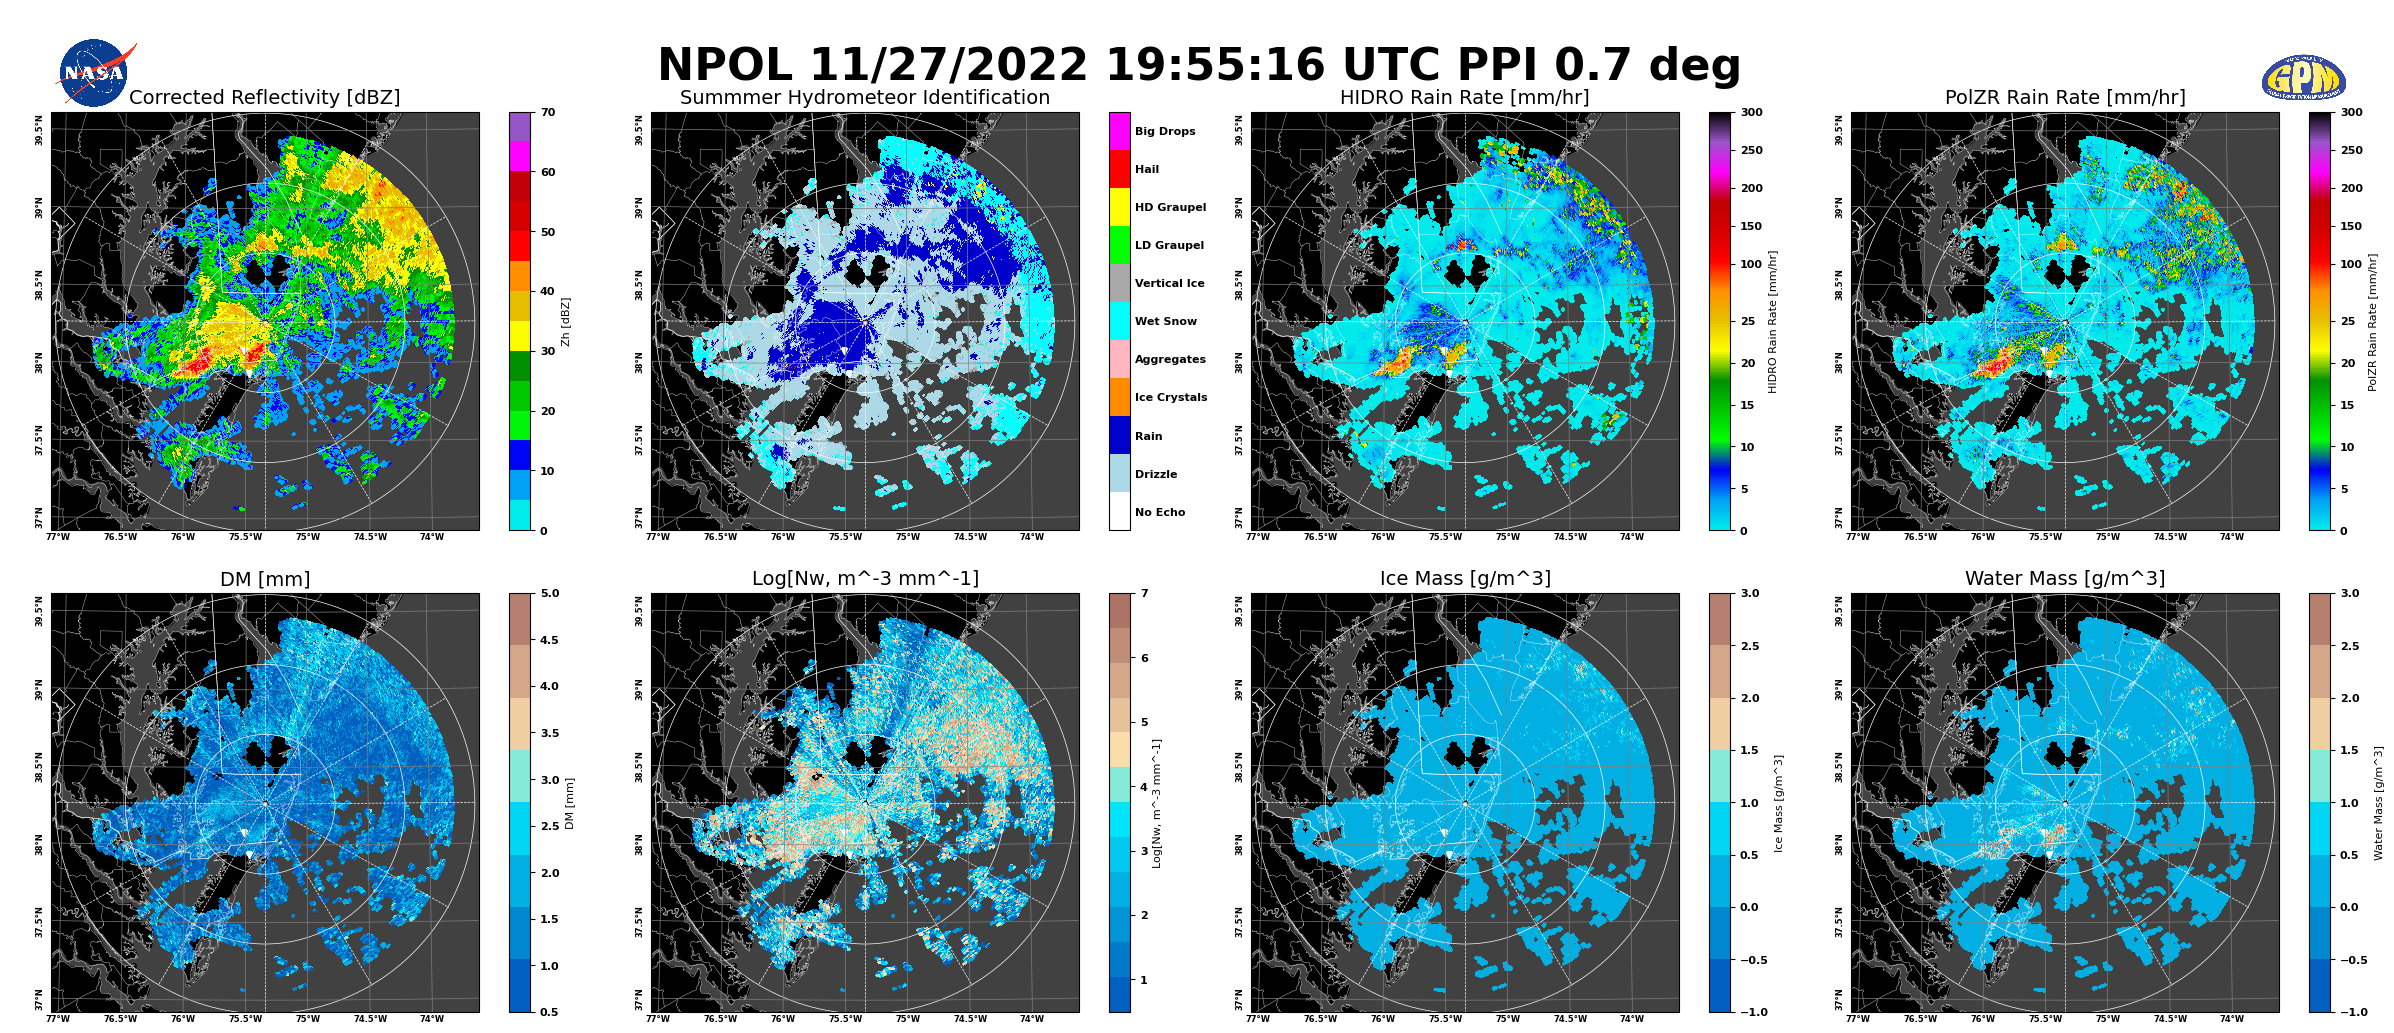

ploting time:   104.27344369888306


In [2]:
from gvradar import GVradar
import requests, os

# Read in file
response = requests.get('https://pmm-gv.gsfc.nasa.gov/pub/NPOL/temp/GVradar/cf/NPOL_2022_1127_195529_PPI.cf.gz')
open("./NPOL_2022_1127_195529_PPI.cf.gz", "wb").write(response.content)

file = "./NPOL_2022_1127_195529_PPI.cf.gz"

kwargs_product = get_kwargs()

radar = []
d = GVradar.DP_products(file, radar, **kwargs_product)
d.run_DP_products()

os.remove(file)

In [1]:
def get_kwargs():
    
    kwargs_product = {}
    
    # Select if you want to output a cf file and what fields to write
    kwargs_product.update({'output_cf': False, 'cf_dir': './cf/', 
                           'output_fields': ['DZ', 'CZ', 'VR', 'DR', 
                                             'KD', 'PH', 'RH', 'SD',
                                             'SQ', 'FH', 'RC', 'DM', 
                                             'NW', 'RP']})
    # Select which products to produce.
    # Calculate Dolan et al. HID fields
    kwargs_product.update({'do_HID_summer': True,
                      'do_HID_winter': False})

    # Do not use temperature in HID calculation
    kwargs_product.update({'no_temp': False})

    # Calculate Bringi KDP field
    kwargs_product.update({'get_Bringi_kdp': True})

    # Calculate Ice and liquid Mass Calculation
    kwargs_product.update({'do_mass': True})

    # Calculate CSU Blended Rainfall Algorithm
    kwargs_product.update({'do_RC': True})

    # Calculate Pol ZR rain rate
    kwargs_product.update({'do_RP': True})

    # Remove bins classified as ice from rain rates and DSD fields
    kwargs_product.update({'de_ice': False})

    # Calculate DM and NW from Tokay et al.
    kwargs_product.update({'do_tokay_DSD': True})

    # Set which DM equations will be applied.
    kwargs_product.update({'dsd_loc': 'wff'})

    # Mask bins beyond 150 km.
    kwargs_product.update({'do_150_mask': False})

    # Get calibration numbers from cal txt files.
    kwargs_product.update({'get_cal_file': False, 'cal_dir': '/gvraid/trmmgv/caltxt_files/'})

    # Apply and set calibration numbers.
    kwargs_product.update({'apply_cal': False, 'ref_cal': 0.0, 'zdr_cal': 0.0})

    # Select plot limits, plot type (single or multiplot), and fields to plot.
    kwargs_product.update({'plot_raw_images': False, 'plot_images': True, 'max_range': 150, 'max_height': 15, 
                   'sweeps_to_plot': [0], 'plot_single': False, 'plot_multi': True,
                   'fields_to_plot': ['CZ', 'FH', 'RC', 'RP',
                                      'DM', 'NW', 'MI', 'MW']})

    # Select fast plots (No Geography), mask values outside colorbar range,
    # Add NASA and GPM logos to plot.  Set png to True to save plots in plot_dir.
    kwargs_product.update({'plot_fast': False, 'mask_outside': True, 'add_logos': True,
                   'png': False, 'plot_dir': './plots/'})

    # A Sounding is needed for DP products, sounding type can be; uwy, ruc, ruc_archive)
    kwargs_product.update({'use_sounding': True, 'sounding_type': 'get_ruc', 'png': False,
                          'sounding_dir': './soundings/'})

    return kwargs_product